#Predicting sale prices of bulldozers using machine learning

##1. Problem definition

how well can we predict the price of a bulldozer using prices and characteristics of previous bulldozers

##2. Data

the data is downloaded from the kaggle bluebook for bulldozers competition ([Kaggle Bluebook for Bulldozers](https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview))

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

#3. Evaluation

the evaluation metric for this model will RMSLE (root mean squared log error) between the actual and the predicted prices 

Note : the goal is to minimize RMSLE value

##4. Features

kaggle provides a data dictionary on the features of the data set. you find the dataset over here : https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
df = pd.read_csv("TrainAndValid.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79980 entries, 0 to 79979
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   79980 non-null  int64  
 1   SalePrice                 79980 non-null  int64  
 2   MachineID                 79980 non-null  int64  
 3   ModelID                   79980 non-null  int64  
 4   datasource                79980 non-null  int64  
 5   auctioneerID              79980 non-null  int64  
 6   YearMade                  79980 non-null  int64  
 7   MachineHoursCurrentMeter  25879 non-null  float64
 8   UsageBand                 22953 non-null  object 
 9   saledate                  79980 non-null  object 
 10  fiModelDesc               79980 non-null  object 
 11  fiBaseModel               79980 non-null  object 
 12  fiSecondaryDesc           57364 non-null  object 
 13  fiModelSeries             5363 non-null   object 
 14  fiMode

In [60]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    54101
UsageBand                   57027
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc             22616
fiModelSeries               74617
fiModelDescriptor           66595
ProductSize                 45860
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                55741
Enclosure                      21
Forks                       36096
Pad_Type                    58875
Ride_Control                45079
Stick                       58875
Transmission                36817
Turbocharged                58875
Blade_Extension             76849
Blade_Width   

In [61]:
df_temp = pd.DataFrame({"saledate" : df["saledate"][0:1000],
                        "SalePrice" : df["SalePrice"][0:1000]})


[]

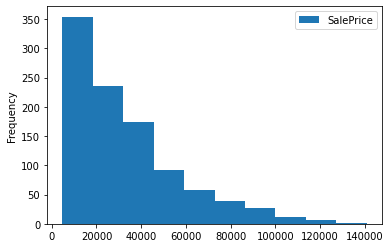

In [62]:
df_temp.plot.hist()

plt.plot()

In [63]:
df_temp[0:100]

,saledate,SalePrice
0,11/16/2006 0:00,66000
1,3/26/2004 0:00,57000
2,2/26/2004 0:00,10000
3,5/19/2011 0:00,38500
4,7/23/2009 0:00,11000
...,...,...
95,12/15/2005 0:00,25500
96,1/29/2004 0:00,17500
97,9/18/2008 0:00,64000
98,11/3/2005 0:00,20500


##Parsing date


In [64]:
df["saledate"]

0        11/16/2006 0:00
1         3/26/2004 0:00
2         2/26/2004 0:00
3         5/19/2011 0:00
4         7/23/2009 0:00
              ...       
79975     12/4/2006 0:00
79976     5/27/2004 0:00
79977     8/25/2005 0:00
79978      6/6/2003 0:00
79979     8/30/2006 0:00
Name: saledate, Length: 79980, dtype: object

In [65]:
df = pd.read_csv("TrainAndValid.csv",
                 parse_dates = ["saledate"])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [66]:
df["saledate"]

0       2006-11-16
1       2004-03-26
2       2004-02-26
3       2011-05-19
4       2009-07-23
           ...    
79975   2006-12-04
79976   2004-05-27
79977   2005-08-25
79978   2003-06-06
79979   2006-08-30
Name: saledate, Length: 79980, dtype: datetime64[ns]

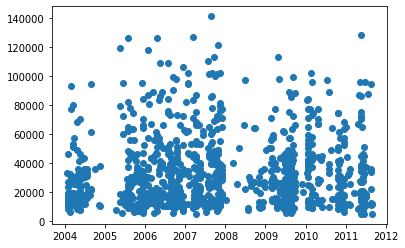

In [67]:
fig, ax = plt.subplots()
ax.scatter(x = df["saledate"][:1000], y= df["SalePrice"][:1000])

##Sorting my data is order by sales date

In [68]:
df = df.sort_values(by = ["saledate"])

In [69]:
df["saledate"][:20]

32138   1989-01-31
28603   1989-01-31
28820   1989-01-31
55454   1989-01-31
63155   1989-01-31
54653   1989-01-31
67974   1989-01-31
75832   1989-01-31
62755   1989-01-31
63166   1989-01-31
63167   1989-01-31
77792   1989-01-31
78445   1989-01-31
55455   1989-01-31
75378   1989-01-31
67034   1989-01-31
31494   1989-01-31
76171   1989-01-31
28927   1989-01-31
66337   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [70]:
df_og = df.copy()

##removing sale date and make the dates more understandable

In [71]:
df["sales_year"] = df["saledate"].dt.year
df["sales_day_of_month"] = df["saledate"].dt.day
df["sales_month"] = df["saledate"].dt.month
df["sales_day_of_week"] = df["saledate"].dt.dayofweek
df["sales_day_of_year"] = df["saledate"].dt.dayofyear


In [72]:
df[:20].T

,32138,28603,28820,55454,63155,54653,67974,75832,62755,63166,63167,77792,78445,55455,75378,67034,31494,76171,28927,66337
SalesID,1264985,1259551,1259842,1305336,1329607,1301884,1344379,1364118,1329056,1329619,1329620,1369631,1371695,1305337,1363540,1340383,1263797,1364654,1259973,1338469
SalePrice,20000,9500,9000,17000,26500,23500,70000,29000,22000,27500,26500,21000,28000,17000,22500,110000,17000,14000,7700,50000
MachineID,1204499,1292226,1226323,1236263,1089631,1182999,1374638,1303693,1336053,436674,1253848,1175092,1444477,1517075,1413842,1311130,1526902,1270628,1150485,1505032
ModelID,6788,6788,6788,3356,4089,4123,3819,7267,4089,4089,4089,4146,1571,3356,7267,3406,6953,7289,6788,23944
datasource,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
auctioneerID,99,18,18,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,18,99
YearMade,1984,1977,1978,1972,1987,1976,1982,1981,1984,1987,1987,1972,1982,1972,1976,1987,1983,1968,1978,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [73]:
df.drop("saledate", axis = 1, inplace=True)

#Turning non numerical data to numerical data


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79980 entries, 32138 to 23972
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   79980 non-null  int64  
 1   SalePrice                 79980 non-null  int64  
 2   MachineID                 79980 non-null  int64  
 3   ModelID                   79980 non-null  int64  
 4   datasource                79980 non-null  int64  
 5   auctioneerID              79980 non-null  int64  
 6   YearMade                  79980 non-null  int64  
 7   MachineHoursCurrentMeter  25879 non-null  float64
 8   UsageBand                 22953 non-null  object 
 9   fiModelDesc               79980 non-null  object 
 10  fiBaseModel               79980 non-null  object 
 11  fiSecondaryDesc           57364 non-null  object 
 12  fiModelSeries             5363 non-null   object 
 13  fiModelDescriptor         13385 non-null  object 
 14  Pr

In [75]:
str_col_names = []
for name in list(df.columns.values):
  if pd.api.types.is_string_dtype(df[name]) == True:
    str_col_names.append(name)

In [76]:
len(str_col_names),len(df.columns.values)

(44, 57)

In [77]:
df_temp = df.copy()
for name in list(df_temp.columns.values):
  if pd.api.types.is_string_dtype(df_temp[name]) == True:
    df_temp[name] = df_temp[name].astype("category")

df = df_temp.copy()

df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79980 entries, 32138 to 23972
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   79980 non-null  int64   
 1   SalePrice                 79980 non-null  int64   
 2   MachineID                 79980 non-null  int64   
 3   ModelID                   79980 non-null  int64   
 4   datasource                79980 non-null  int64   
 5   auctioneerID              79980 non-null  int64   
 6   YearMade                  79980 non-null  int64   
 7   MachineHoursCurrentMeter  25879 non-null  float64 
 8   UsageBand                 22953 non-null  category
 9   fiModelDesc               79980 non-null  category
 10  fiBaseModel               79980 non-null  category
 11  fiSecondaryDesc           57364 non-null  category
 12  fiModelSeries             5363 non-null   category
 13  fiModelDescriptor         13385 non-null  

In [78]:
df.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [79]:
df.state.cat.codes

32138     8
28603     9
28820     9
55454     8
63155     8
         ..
23967    10
23968     4
23970     4
23971    43
23972    43
Length: 79980, dtype: int8

##Filling missing values

In [80]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    54101
UsageBand                   57027
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc             22616
fiModelSeries               74617
fiModelDescriptor           66595
ProductSize                 45860
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                55741
Enclosure                      21
Forks                       36096
Pad_Type                    58875
Ride_Control                45079
Stick                       58875
Transmission                36817
Turbocharged                58875
Blade_Extension             76849
Blade_Width                 76849
Enclosure_Type

In [81]:
temp_list = list(df.columns.values)
for name in temp_list:
  if pd.api.types.is_numeric_dtype(df[name]) == True:
    if pd.isnull(df[name]).sum():
      df[name + "_is_missing"] = df[name]
      df_temp[name] = df_temp[name].fillna(df[name].median())
      df[name] = df[name].fillna(df[name].median())
df.T   

,32138,28603,28820,55454,63155,54653,67974,75832,62755,63166,...,23905,23906,23903,23969,23973,23967,23968,23970,23971,23972
SalesID,1264985,1259551,1259842,1305336,1329607,1301884,1344379,1364118,1329056,1329619,...,1222590,1222591,1222588,1222814,1222823,1222811,1222813,1222817,1222820,1222821
SalePrice,20000,9500,9000,17000,26500,23500,70000,29000,22000,27500,...,18000,20500,21500,45000,11000,37000,102000,11000,100000,100000
MachineID,1204499,1292226,1226323,1236263,1089631,1182999,1374638,1303693,1336053,436674,...,618007,597096,53188,1024552,1051644,1049475,1038562,999753,1010621,1016175
ModelID,6788,6788,6788,3356,4089,4123,3819,7267,4089,4089,...,1536,1536,3542,3893,17793,13284,13316,25175,16725,16725
datasource,132,132,132,132,132,132,132,132,132,132,...,121,121,121,121,121,121,121,121,121,121
auctioneerID,99,18,18,99,99,99,99,99,99,99,...,3,3,3,3,3,3,3,3,3,3
YearMade,1984,1977,1978,1972,1987,1976,1982,1981,1984,1987,...,2004,2004,2002,1000,2003,2001,2006,2002,2005,2005
MachineHoursCurrentMeter,2628.0,2628.0,2628.0,2628.0,2628.0,2628.0,2628.0,2628.0,2628.0,2628.0,...,5395.0,6045.0,8181.0,13514.0,0.0,3197.0,1764.0,7140.0,9946.0,9341.0
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,High,High,High,Low,NaN,Low,Low,High,High,High
fiModelDesc,580,580,580,12F,D3B,D6C,950B,930,D3B,D3B,...,D3GXL,D3GXL,420D,992C,HR1.6,821C,CX290,570MXT,WA600-3,WA600-3


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79980 entries, 32138 to 23972
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   SalesID                              79980 non-null  int64   
 1   SalePrice                            79980 non-null  int64   
 2   MachineID                            79980 non-null  int64   
 3   ModelID                              79980 non-null  int64   
 4   datasource                           79980 non-null  int64   
 5   auctioneerID                         79980 non-null  int64   
 6   YearMade                             79980 non-null  int64   
 7   MachineHoursCurrentMeter             79980 non-null  float64 
 8   UsageBand                            22953 non-null  category
 9   fiModelDesc                          79980 non-null  category
 10  fiBaseModel                          79980 non-null  category
 11  fiSecondary

In [83]:
df.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                              57027
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                        22616
fiModelSeries                          74617
fiModelDescriptor                      66595
ProductSize                            45860
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                           55741
Enclosure                                 21
Forks                                  36096
Pad_Type  

In [84]:
pd.Categorical(df["state"]).codes

array([ 8,  9,  9, ...,  4, 43, 43], dtype=int8)

In [85]:
for val in temp_list:
  if pd.api.types.is_categorical_dtype(df[val]) == True:
    df[val + "_is_missing"] = df[val]
    df[val] = pd.Categorical(df[val]).codes + 1
    df[val] = df[val].fillna(0)
    df_temp[val] = pd.Categorical(df[val]).codes + 1
    df_temp[val] = df[val].fillna(0)


In [86]:
df_temp.isnull().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

##Lets build a machine learnign model

In [87]:
len(df_temp)

79980

In [88]:
df_train= df_temp[df_temp["sales_year"] < 2012]
df_train.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,sales_year,sales_day_of_month,sales_month,sales_day_of_week,sales_day_of_year
23967,1222811,37000,1049475,13284,121,3,2001,3197.0,2,902,...,0,0,0,3,2,2011,29,12,3,363
23968,1222813,102000,1038562,13316,121,3,2006,1764.0,2,1166,...,0,0,0,0,0,2011,29,12,3,363
23970,1222817,11000,999753,25175,121,3,2002,7140.0,1,625,...,0,0,0,0,0,2011,29,12,3,363
23971,1222820,100000,1010621,16725,121,3,2005,9946.0,1,2464,...,0,0,0,3,2,2011,29,12,3,363
23972,1222821,100000,1016175,16725,121,3,2005,9341.0,1,2464,...,0,0,0,3,2,2011,29,12,3,363


In [89]:
df_valid = df_temp.query('sales_month >= 1 & sales_month <= 4 & sales_year == 2012')
df_valid

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,sales_year,sales_day_of_month,sales_month,sales_day_of_week,sales_day_of_year


In [90]:
x_train = df_train.drop("SalePrice", axis = 1)
y_train = df_train["SalePrice"]

In [91]:
x_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,sales_year,sales_day_of_month,sales_month,sales_day_of_week,sales_day_of_year
32138,1264985,1204499,6788,132,99,1984,2628.0,0,630,236,...,0,0,0,0,0,1989,31,1,1,31
28603,1259551,1292226,6788,132,18,1977,2628.0,0,630,236,...,0,0,0,0,0,1989,31,1,1,31
28820,1259842,1226323,6788,132,18,1978,2628.0,0,630,236,...,0,0,0,0,0,1989,31,1,1,31
55454,1305336,1236263,3356,132,99,1972,2628.0,0,48,11,...,0,0,0,0,0,1989,31,1,1,31
63155,1329607,1089631,4089,132,99,1987,2628.0,0,1248,456,...,1,6,6,0,0,1989,31,1,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23967,1222811,1049475,13284,121,3,2001,3197.0,2,902,308,...,0,0,0,3,2,2011,29,12,3,363
23968,1222813,1038562,13316,121,3,2006,1764.0,2,1166,437,...,0,0,0,0,0,2011,29,12,3,363
23970,1222817,999753,25175,121,3,2002,7140.0,1,625,234,...,0,0,0,0,0,2011,29,12,3,363
23971,1222820,1010621,16725,121,3,2005,9946.0,1,2464,1045,...,0,0,0,3,2,2011,29,12,3,363


In [92]:
y_train

32138     20000
28603      9500
28820      9000
55454     17000
63155     26500
          ...  
23967     37000
23968    102000
23970     11000
23971    100000
23972    100000
Name: SalePrice, Length: 79980, dtype: int64

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model = RandomForestRegressor()

In [94]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [95]:
def root_mean_squared_log_error(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [96]:
def reg_score(y_true, y_pred):
  print("RMSLE : " + str(root_mean_squared_log_error(y_true, y_pred)))
  print("MAE : " + str( mean_absolute_error(y_true, y_pred)))
  print("R^2 : " + str(r2_score(y_true, y_pred)) )

In [97]:
# model = RandomForestRegressor(n_jobs = -1,
#                               random_state = 42)
# model.fit(x_train,y_train)

In [98]:
# reg_score(y_train, model.predict(x_train))

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
parameters = {
    "n_estimators" : np.arange(10,100,10),
    "max_depth" : [None, 3,5,10],
    "min_samples_split" : np.arange(2,20,2),
    "min_samples_leaf" : np.arange(1,20,2),
    "max_features" : [0.5, 1, "Sqrt", "auto"],
    "max_samples": [10000]
}

model_rscv = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                               random_state= 42), 
                                                parameters,
                                                n_iter = 2,
                                                cv = 5,
                                                verbose = True)
model_rscv.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'Sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [101]:
def df_data_prepare(df):
  df["sales_year"] = df["saledate"].dt.year
  df["sales_day_of_month"] = df["saledate"].dt.day
  df["sales_month"] = df["saledate"].dt.month
  df["sales_day_of_week"] = df["saledate"].dt.dayofweek
  df["sales_day_of_year"] = df["saledate"].dt.dayofyear
  df.drop("saledate", axis = 1, inplace=True)
  str_col_names = []
  for name in list(df.columns.values):
    if pd.api.types.is_string_dtype(df[name]) == True:
      str_col_names.append(name)
  df_temp_2 = df.copy()
  for name in list(df_temp_2.columns.values):
    if pd.api.types.is_string_dtype(df_temp_2[name]) == True:
      df_temp_2[name] = df_temp_2[name].astype("category")

  df = df_temp_2.copy()

  temp_list = list(df.columns.values)
  for name in temp_list:
    if pd.api.types.is_numeric_dtype(df[name]) == True:
      if pd.isnull(df[name]).sum():
        df[name + "_is_missing"] = df[name]
        df_temp_2[name] = df_temp_2[name].fillna(df[name].median())
        df[name] = df[name].fillna(df[name].median())
  for val in temp_list:
    if pd.api.types.is_categorical_dtype(df[val]) == True:
      df[val + "_is_missing"] = df[val]
      df[val] = pd.Categorical(df[val]).codes + 1
      df[val] = df[val].fillna(0)
      df_temp_2[val] = pd.Categorical(df[val]).codes + 1
      df_temp_2[val] = df[val].fillna(0)

  return df_temp_2

df_valid = pd.read_csv("Valid.csv",
                 parse_dates = ["saledate"])
df_valid = df_data_prepare(df_valid)

In [102]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   11573 non-null  int64  
 1   MachineID                 11573 non-null  int64  
 2   ModelID                   11573 non-null  int64  
 3   datasource                11573 non-null  int64  
 4   auctioneerID              11573 non-null  int64  
 5   YearMade                  11573 non-null  int64  
 6   MachineHoursCurrentMeter  11573 non-null  float64
 7   UsageBand                 11573 non-null  int8   
 8   fiModelDesc               11573 non-null  int16  
 9   fiBaseModel               11573 non-null  int16  
 10  fiSecondaryDesc           11573 non-null  int8   
 11  fiModelSeries             11573 non-null  int8   
 12  fiModelDescriptor         11573 non-null  int8   
 13  ProductSize               11573 non-null  int8   
 14  fiProd

In [103]:
df_valid.isnull().sum()

SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier 

In [105]:
valid_solution = pd.read_csv("ValidSolution.csv")
valid_solition = valid_solution.sort_values("SalesID")
df_valid = df_valid.sort_values("SalesID")

x_valid = df_valid
y_valid = valid_solution["SalePrice"]
y_valid_pred = model_rscv.predict(x_valid)

reg_score(y_valid, y_valid_pred)


RMSLE : 0.5388569350699475
MAE : 14174.832441583552
R^2 : 0.44637732533960583
